In [29]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from torchvision import transforms

import os
import easyocr

In [2]:
annot_file = pd.read_csv("x__data/license_plates_detection_train.csv")

In [3]:
row = annot_file.sample(1)
img_name = row["img_id"].values[0]
box = row.iloc[:,1:].values.flatten()
box

array([301, 125, 329, 266], dtype=int64)

In [4]:
row

,img_id,ymin,xmin,ymax,xmax
834,850.jpg,301,125,329,266


In [5]:
img = Image.open(f"x__data/license_plates_detection_train/license_plates_detection_train/{img_name}")

In [6]:
init_shape = img.size
init_shape

(410, 493)

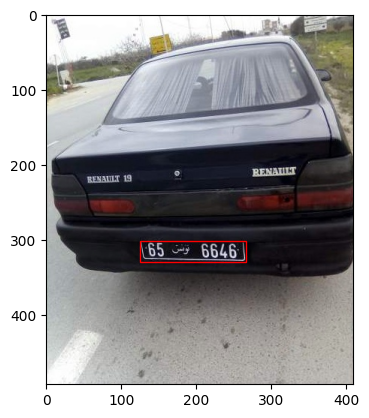

In [7]:
fig, ax = plt.subplots()
ax.imshow(img)

rect = patches.Rectangle((box[1], box[0]), box[3]-box[1], box[2]-box[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [8]:
img_after_resize = img.resize((224,224))


x1 = box[1]
y1 = box[0]
width = box[3]-box[1]
height = box[2]-box[0]

x_scale = 224/init_shape[0]
y_scale = 224/init_shape[1]

xr = x1 * x_scale
yr = y1 * y_scale
widthr = x_scale * width
heightr = y_scale * height

In [9]:
width

141

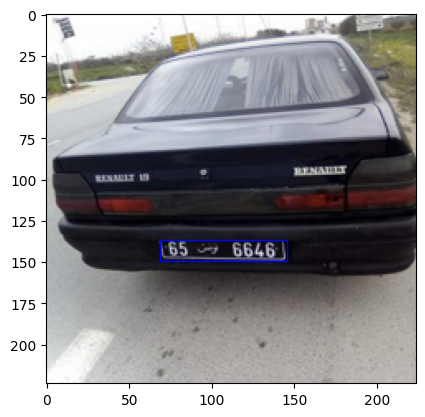

In [10]:
fig, ax = plt.subplots()
ax.imshow(img_after_resize)

rect = patches.Rectangle((xr, yr), widthr, heightr, linewidth=1, edgecolor="b", facecolor="none")

ax.add_patch(rect)

In [12]:
plt.imshow(plt.imread(img_path))

NameError: name 'img_path' is not defined

In [34]:
import numpy as np

In [38]:
img_path = "x__data/license_plates_recognition_train/license_plates_recognition_train/67.jpg"
img = Image.open(img_path)



reader = easyocr.Reader(["ar"], gpu=False)
reader.readtext(np.array(img)//255, low_text=0.5)

Using CPU. Note: This module is much faster with a GPU.


[]

In [140]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)

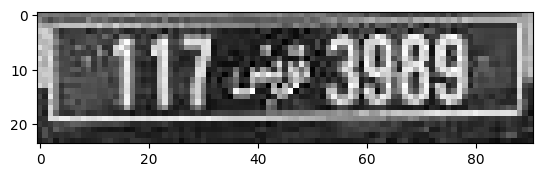

In [136]:
plt.imshow(img, cmap="gray")

In [115]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)
_,img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)

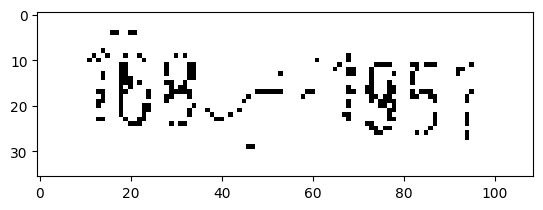

In [116]:
# plt.imshow(img)
plt.imshow(img, cmap="gray")

In [117]:
reader = easyocr.Reader(["ar"], gpu=False)
reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


[[[[12, 4], [46, 4], [46, 30], [12, 30]], '-؟:', 0.043783699969698234],
 [[[68, 6], [92, 6], [92, 30], [68, 30]], '55', 0.32517735200743786]]

In [28]:
annot = pd.read_csv("x__data/license_plates_recognition_train.csv")
annot[annot["img_id"]== "0.jpg"]["text"].values

array(['117T3989'], dtype=object)

In [21]:
annot

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979
...,...,...
895,95.jpg,39T8707
896,96.jpg,92T589
897,97.jpg,180T706
898,98.jpg,87T7369
